# PROJECT NAME : INSURACE COST ANALYSIS



In this project, I have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives:
In this project, I will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 

Importing required libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_predict,cross_val_score,train_test_split

In [8]:
#reading the data 
df = pd.read_csv("medical_insurance_dataset.csv")

In [9]:
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [10]:
#adding headers
headers = ["Age","Gender","BMI","No_of_Children","Smoker","Region","Charges"]
df.columns = headers

In [11]:
#replacing '?' entries
df.replace('?',np.nan,inplace= True)

DATA WRANGLING

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2767 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [13]:
mean_age = df['Age'].astype("float").mean(axis=0)
df['Age'].replace(np.nan,mean_age,inplace=True)

is_smoker = df['Smoker'].value_counts().idxmax()
df['Smoker'].replace(np.nan,is_smoker,inplace=True) 

df[["Age","Smoker"]] = df[["Age","Smoker"]].astype("int")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2771 non-null   int32  
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_Children  2771 non-null   int64  
 4   Smoker          2771 non-null   int32  
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


In [14]:
# rounding up the charges to 2 decimal places 
df['Charges']=np.round(df[['Charges']],2)
df.head()

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


# Exploratory Data Analysis (EDA)

Regression plot: BMI Vs Charges

(0.0, 66902.85800000001)

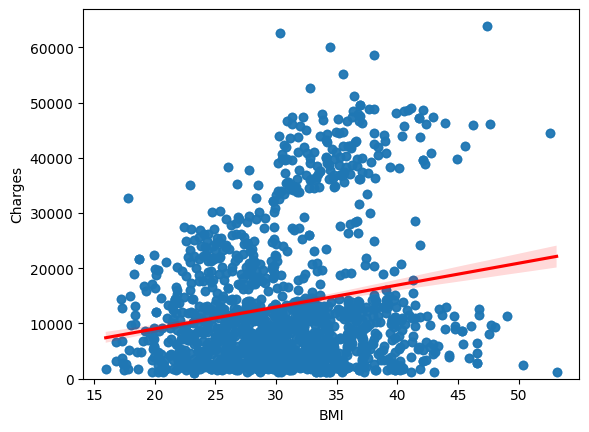

In [15]:
sns.regplot(x=df['BMI'],y=df['Charges'],line_kws={"color" : "Red"})
plt.ylim(0,)

Boxplot:Smoker Vs Charges

<Axes: xlabel='Smoker', ylabel='Charges'>

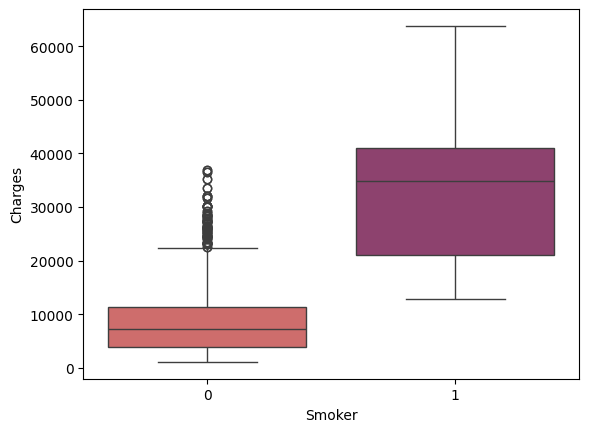

In [16]:
sns.boxplot(x='Smoker',y='Charges',data=df ,palette="flare",hue="Smoker",legend=False)

In [17]:
df.corr(numeric_only=True)

,Age,Gender,BMI,No_of_Children,Smoker,Region,Charges
Age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
Gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
BMI,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
No_of_Children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
Smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
Region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
Charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


The Attributes that affect `charges` the most is:  
---> `Smoker`    
---> `BMI`
 

# Model Development


In [18]:
lr = LinearRegression()
X = df[['Smoker']]
Y = df['Charges']
lr.fit(X,Y)
lr.score(X,Y)

0.6227430402464125

To improve the model's performance


In [19]:
Z = df[["Age","Gender","BMI","No_of_Children","Smoker","Region"]]
Y = df['Charges']
lr.fit(Z,Y)
lr.score(Z,Y)

0.7505888664568174

Creating a pipeline

In [20]:
Input = [('scale',StandardScaler()),('polymonial',PolynomialFeatures(include_bias=False)),("model",LinearRegression())]
pipe= Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe= pipe.predict(Z)
print(r2_score(Y,ypipe))


0.8453715392272488


# Model Refinement

In [21]:
x_train,x_test,y_train,y_test = train_test_split(Z,Y,test_size=0.2,random_state = 1)

Initializing a ridgeregressor model 

In [24]:
Ridgemodel = Ridge(alpha=0.1)
Ridgemodel.fit(x_train,y_train)
yhat = Ridgemodel.predict(x_test)
print(r2_score(y_test,yhat))

0.7254198858412229


Applying polynomial transformation

In [26]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
Ridgemodel.fit(x_train_pr, y_train)
y_hat = Ridgemodel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8208413195172467
